In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [60]:
df = pd.read_csv('..//output//output.csv')

In [61]:
df.head()

,Graph number,Number of vertices,starting colour vertex,ending colour vertex,step time,cycle
0,1,5,"[1, 1, 1, 1, 1]","[1, 1, 1, 1, 1]",1,1
1,1,5,"[1, 1, 1, 1, -1]","[1, 1, 1, 1, 1]",2,1
2,1,5,"[1, 1, 1, -1, 1]","[1, 1, 1, 1, 1]",2,1
3,1,5,"[1, 1, 1, -1, -1]","[1, 1, 1, 1, 1]",2,1
4,1,5,"[1, 1, -1, 1, 1]","[1, 1, 1, 1, 1]",2,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11648 entries, 0 to 11647
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Graph number            11648 non-null  int64 
 1   Number of vertices      11648 non-null  int64 
 2   starting colour vertex  11648 non-null  object
 3   ending colour vertex    11648 non-null  object
 4   step time               11648 non-null  int64 
 5   cycle                   11648 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 546.1+ KB


In [63]:
df[['cycle', 'step time']].describe()

,cycle,step time
count,11648.000000,11648.000000
mean,1.171274,2.240127
std,0.376764,0.972330
min,1.000000,1.000000
25%,1.000000,2.000000
50%,1.000000,2.000000
75%,1.000000,3.000000
max,2.000000,5.000000


In [64]:
print(df['step time'].value_counts())
df['step'] = df['step time']

2    5365
3    2560
1    2523
4     840
5     360
Name: step time, dtype: int64


In [65]:
df.step.value_counts(normalize=True)*100

2    46.059409
3    21.978022
1    21.660371
4     7.211538
5     3.090659
Name: step, dtype: float64

In [66]:
sns.set_style("whitegrid")
sns.despine()

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

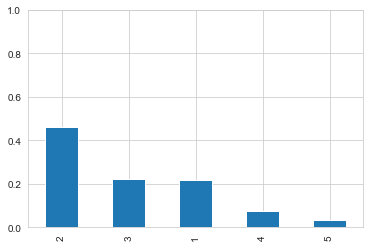

In [69]:
plt.ylim(0,1)
df.step.value_counts(normalize=True).plot(kind='bar')

In [ ]:
data = df.copy()
data.loc[data['cycle'] > data['cycle'].quantile(0.99)] = '>6'
plt.figure(figsize=(8,5))
sns.countplot(x=data['cycle'].astype('str').sort_values(), palette = 'pastel', edgecolor = '0.8', hue = data['Number of vertices'])
plt.title("cycle",fontsize=15)
plt.show()

In [ ]:
sns.countplot(x="Number of vertices", hue="step time",  data=df)

In [ ]:
sns.catplot(x="cycle", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

In [ ]:
plt.scatter(x=df['Number of vertices'], y=df['cycle'], marker='o');

In [ ]:
from scipy.stats import kurtosis, skew
x = df['step time']
kurt = kurtosis(x, fisher=True)
skew = skew(x)
print(kurt, skew)

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.suptitle('kurtosis and skew for the cycle var')
axs[0].hist(kurt, bins =10)
axs[1].hist(skew, bins =10)